In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas matplotlib

In [2]:
import sqlite3, random
import pandas as pd
import xml.dom.minidom as xd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
conn = sqlite3.connect('../data/soccer/database.sqlite')

In [6]:
df = pd.read_sql_query('''SELECT Match.date, Match.league_id,
                                    AwayTeam.team_long_name AS away_team_name, Match.away_team_goal,
                                    HomeTeam.team_long_name AS home_team_name, Match.home_team_goal,
                                    Match.home_player_X1, Match.home_player_Y1,
                                    Match.home_player_X2, Match.home_player_Y2,
                                    Match.home_player_X3, Match.home_player_Y3,
                                    Match.home_player_X4, Match.home_player_Y4,
                                    Match.home_player_X5, Match.home_player_Y5,
                                    Match.home_player_X6, Match.home_player_Y6,
                                    Match.home_player_X7, Match.home_player_Y7,
                                    Match.home_player_X8, Match.home_player_Y8,
                                    Match.home_player_X9, Match.home_player_Y9,
                                    Match.home_player_X10, Match.home_player_Y10,
                                    Match.home_player_X11, Match.home_player_Y11,
                                    Match.away_player_X1, Match.away_player_Y1,
                                    Match.away_player_X2, Match.away_player_Y2,
                                    Match.away_player_X3, Match.away_player_Y3,
                                    Match.away_player_X4, Match.away_player_Y4,
                                    Match.away_player_X5, Match.away_player_Y5,
                                    Match.away_player_X6, Match.away_player_Y6,
                                    Match.away_player_X7, Match.away_player_Y7,
                                    Match.away_player_X8, Match.away_player_Y8,
                                    Match.away_player_X9, Match.away_player_Y9,
                                    Match.away_player_X10, Match.away_player_Y10,
                                    Match.away_player_X11, Match.away_player_Y11,
                                    HomePlayer1.player_name AS home_player_1,
                                    HomePlayer2.player_name AS home_player_2,
                                    HomePlayer3.player_name AS home_player_3,
                                    HomePlayer4.player_name AS home_player_4,
                                    HomePlayer5.player_name AS home_player_5,
                                    HomePlayer6.player_name AS home_player_6,
                                    HomePlayer7.player_name AS home_player_7,
                                    HomePlayer8.player_name AS home_player_8,
                                    HomePlayer9.player_name AS home_player_9,
                                    HomePlayer10.player_name AS home_player_10,
                                    HomePlayer11.player_name AS home_player_11,
                                    AwayPlayer1.player_name AS away_player_1,
                                    AwayPlayer2.player_name AS away_player_2,
                                    AwayPlayer3.player_name AS away_player_3,
                                    AwayPlayer4.player_name AS away_player_4,
                                    AwayPlayer5.player_name AS away_player_5,
                                    AwayPlayer6.player_name AS away_player_6,
                                    AwayPlayer7.player_name AS away_player_7,
                                    AwayPlayer8.player_name AS away_player_8,
                                    AwayPlayer9.player_name AS away_player_9,
                                    AwayPlayer10.player_name AS away_player_10,
                                    AwayPlayer11.player_name AS away_player_11
                        FROM Match
                        JOIN Team AwayTeam ON AwayTeam.team_api_id = Match.away_team_api_id
                        JOIN Team HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                        JOIN League ON League.country_id = Match.league_id AND League.name = "England Premier League"
                        JOIN Player HomePlayer1 ON HomePlayer1.player_api_id = Match.home_player_1
                        JOIN Player HomePlayer2 ON HomePlayer2.player_api_id = Match.home_player_2
                        JOIN Player HomePlayer3 ON HomePlayer3.player_api_id = Match.home_player_3
                        JOIN Player HomePlayer4 ON HomePlayer4.player_api_id = Match.home_player_4
                        JOIN Player HomePlayer5 ON HomePlayer5.player_api_id = Match.home_player_5
                        JOIN Player HomePlayer6 ON HomePlayer6.player_api_id = Match.home_player_6
                        JOIN Player HomePlayer7 ON HomePlayer7.player_api_id = Match.home_player_7
                        JOIN Player HomePlayer8 ON HomePlayer8.player_api_id = Match.home_player_8
                        JOIN Player HomePlayer9 ON HomePlayer9.player_api_id = Match.home_player_9
                        JOIN Player HomePlayer10 ON HomePlayer10.player_api_id = Match.home_player_10
                        JOIN Player HomePlayer11 ON HomePlayer11.player_api_id = Match.home_player_11
                        JOIN Player AwayPlayer1 ON AwayPlayer1.player_api_id = Match.away_player_1
                        JOIN Player AwayPlayer2 ON AwayPlayer2.player_api_id = Match.away_player_2
                        JOIN Player AwayPlayer3 ON AwayPlayer3.player_api_id = Match.away_player_3
                        JOIN Player AwayPlayer4 ON AwayPlayer4.player_api_id = Match.away_player_4
                        JOIN Player AwayPlayer5 ON AwayPlayer5.player_api_id = Match.away_player_5
                        JOIN Player AwayPlayer6 ON AwayPlayer6.player_api_id = Match.away_player_6
                        JOIN Player AwayPlayer7 ON AwayPlayer7.player_api_id = Match.away_player_7
                        JOIN Player AwayPlayer8 ON AwayPlayer8.player_api_id = Match.away_player_8
                        JOIN Player AwayPlayer9 ON AwayPlayer9.player_api_id = Match.away_player_9
                        JOIN Player AwayPlayer10 ON AwayPlayer10.player_api_id = Match.away_player_10
                        JOIN Player AwayPlayer11 ON AwayPlayer11.player_api_id = Match.away_player_11''', conn)

In [4]:
pd.set_option('display.max_columns', None)
# df2 = pd.read_sql_query('select * from Match join League on League.country_id = Match.league_id and League.name = "England Premier League"', conn)
df2 = pd.read_sql_query('select * from Player', conn)
df2

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [7]:
df

,date,league_id,away_team_name,away_team_goal,home_team_name,home_team_goal,home_player_X1,home_player_Y1,home_player_X2,home_player_Y2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2008-08-17 00:00:00,1729,Newcastle United,1,Manchester United,1,1,1,2,3,...,Habib Beye,Steven Taylor,Fabricio Coloccini,Charles N'Zogbia,James Milner,Danny Guthrie,Nicky Butt,Jonas Gutierrez,Damien Duff,Obafemi Martins
1,2008-08-16 00:00:00,1729,West Bromwich Albion,0,Arsenal,1,1,1,2,3,...,Carl Hoefkens,Leon Barnett,Abdoulaye Meite,Paul Robinson,Jonathan Greening,Do-Heon Kim,Chris Brunt,James Morrison,Marek Cech,Ishmael Miller
2,2008-08-16 00:00:00,1729,Liverpool,1,Sunderland,0,1,1,2,3,...,Alvaro Arbeloa,Jamie Carragher,Sami Hyypiae,Andrea Dossena,Dirk Kuyt,Steven Gerrard,Damien Plessis,Yossi Benayoun,Robbie Keane,Fernando Torres
3,2008-08-16 00:00:00,1729,Wigan Athletic,1,West Ham United,2,1,1,2,3,...,Mario Melchiot,Emmerson Boyce,Maynor Figueroa,Paul Scharner,Antonio Valencia,Lee Cattermole,Wilson Palacios,Olivier Kapo,Amr Zaki,Emile Heskey
4,2008-08-16 00:00:00,1729,Blackburn Rovers,3,Everton,2,1,1,2,3,...,Andre Ooijer,Christopher Samba,Ryan Nelsen,Stephen Warnock,David Dunn,Aaron Mokoena,Morten Gamst Pedersen,Steven Reid,Jason Roberts,Roque Santa Cruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,2015-10-17 00:00:00,1729,Leicester City,2,Southampton,2,1,1,2,3,...,Danny Simpson,Wes Morgan,Robert Huth,Christian Fuchs,Marc Albrighton,Danny Drinkwater,N'Golo Kante,Jeffrey Schlupp,Shinji Okazaki,Jamie Vardy
2958,2015-10-19 00:00:00,1729,Stoke City,1,Swansea City,0,1,1,2,3,...,Glen Johnson,Geoff Cameron,Philipp Wollscheid,Erik Pieters,Glenn Whelan,Charlie Adam,Xherdan Shaqiri,Bojan Krkic,Marko Arnautovic,Joselu
2959,2015-10-17 00:00:00,1729,Liverpool,0,Tottenham Hotspur,0,1,1,2,3,...,Nathaniel Clyne,Martin Skrtel,Mamadou Sakho,Alberto Moreno,Lucas Leiva,Emre Can,James Milner,Philippe Coutinho,Adam Lallana,Divock Origi
2960,2015-10-17 00:00:00,1729,Arsenal,3,Watford,0,1,1,2,3,...,Hector Bellerin,Per Mertesacker,Laurent Koscielny,Nacho Monreal,Francis Coquelin,Santi Cazorla,Aaron Ramsey,Mesut Oezil,Alexis Sanchez,Theo Walcott


(away) Sunderland 2 : 1 Chelsea (home)


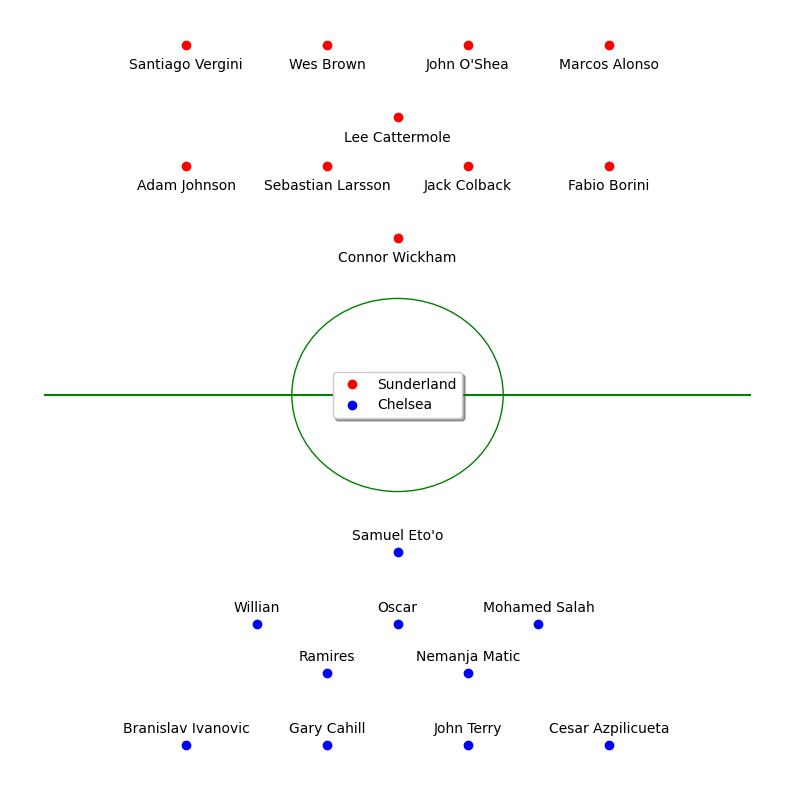

In [85]:
match_id = random.randint(0, 3039)
# show_description(df, match_id)
show_result(df, match_id)
show_formations(df, match_id)

In [14]:
def show_result(df, match_id):
    match = df.iloc[match_id]
    print(f'(away) {match['away_team_name']} {match['away_team_goal']} : {match['home_team_goal']} {match['home_team_name']} (home)')

In [81]:
def show_formations(df, match_id):
    match = df.iloc[match_id]
    plt.figure(figsize=(10, 10))
    
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'away_player_X{i}'])
        y.append(35 - match[f'away_player_Y{i}'])
        plt.annotate(match[f'away_player_{i}'], (x[-1], y[-1] - 1), ha='center')
    
    plt.plot(x, y, 'o', color='r')
        
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'home_player_X{i}'])
        y.append(match[f'home_player_Y{i}'])
        plt.annotate(match[f'home_player_{i}'], (x[-1], y[-1] + 0.5), ha='center')
    
    plt.plot(x, y, 'o', color='b')
    plt.plot([0, 10],[17.5, 17.5],color='g')
    
    circle = Ellipse((5, 17.5), 3, 8, color='g', fill=False)
    plt.gca().add_patch(circle)

    plt.legend([match['away_team_name'], match['home_team_name']], loc='center', fancybox=True, shadow=True)
    plt.axis('off')
    plt.show()